# 🌿 **Palm Disease Detection Using Deep Learning**
### **📌 Project Overview**
This project focuses on **automated detection and classification of palm tree diseases** using **machine learning and deep learning techniques**. By analyzing images of diseased palm leaves, we aim to develop a model that assists in **early detection and diagnosis**, benefiting farmers and agricultural experts in managing plantations effectively.

---

### **🔹 Problem Statement**
Palm trees play a crucial role in **Malaysia’s agricultural economy**, but diseases can **significantly impact yield and quality**. Manual disease detection is **time-consuming and error-prone**. This project leverages **AI-driven image classification** to provide an **efficient and scalable solution** for identifying palm diseases.

---

### **🔹 Objectives**
- **Analyze and preprocess a dataset** of palm disease images.  
- **Visualize disease patterns using Principal Component Analysis (PCA).**  
- **Develop machine learning and deep learning models** for disease classification.  
- **Train a deep learning model (MobileNetV2) using transfer learning** for improved accuracy.  
- **Evaluate misclassified images** to refine model performance.  
- **Provide insights and recommendations** for practical agricultural applications.  

---

### **🔹 Approach**
1️⃣ **Dataset Preparation & Preprocessing** – Image augmentation, resizing, and normalization.  
2️⃣ **Exploratory Data Analysis (EDA)** – Understanding class distributions and patterns.  
3️⃣ **Dimensionality Reduction (PCA)** – Visualizing feature space to understand data variability.  
4️⃣ **Model Development**    
   - **Deep Learning Model:** MobileNetV2 with transfer learning.  
5️⃣ **Model Evaluation & Error Analysis** – Identifying misclassified images and improving predictions.  
6️⃣ **Real-World Application** – Recommendations for model deployment in agricultural settings.  

---

### **🔹 Significance**
This project demonstrates how **AI and deep learning can revolutionize agriculture**, offering an automated, scalable, and accurate disease detection system. By integrating machine learning, PCA visualization, and transfer learning, we provide a **comprehensive solution** for real-world agricultural challenges.


### Import Necessary Libraries
This cell imports TensorFlow and Keras modules required for deep learning, as well as the MobileNetV2 model, which is a lightweight pre-trained model suitable for image classification tasks.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models


### Load and Preprocess Dataset
1. Defines the dataset directory.
2. Retrieves category names (subfolder names) to use as labels.
3. Loops through each category folder to:
   - Read images using OpenCV.
   - Resize them to 224x224.
   - Normalize pixel values to the range [0,1].
4. Converts data into NumPy arrays.
5. Applies one-hot encoding to labels for multi-class classification.
6. Splits data into training (80%) and validation (20%) sets.


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2

# data_dir = "/content/drive/MyDrive/MachineLearning Notebooks/palm_disease_project/Processed"
data_dir = "/content/drive/MyDrive/Machine Learning /ML Project/palm_disease_project/Processed"
img_size = (224, 224)  # Resize images to 224x224
categories = os.listdir(data_dir)  # Get subfolder names (categories)
categories.sort()  # Sort categories to ensure consistent label assignment

X = []
y = []

for label, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    # Loop through all images in each category folder
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        # Load and resize image
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)  # Resize image to 224x224
        img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

        # Append image and corresponding label to the lists
        X.append(img)
        y.append(label)

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# If you need to one-hot encode the labels for multi-class classification
y = to_categorical(y, num_classes=len(categories))

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

# Now X_train, y_train, X_val, and y_val are ready for training your model


Training set size: 2471
Validation set size: 618


### Analyzing Dataset Distribution
Before training the model, it is essential to understand the dataset distribution. This cell:
- Counts the number of images in each disease category.
- Plots a bar chart to visualize the dataset imbalance.
- Helps identify whether some categories are underrepresented, which may impact model performance.
This step ensures we have balanced training data or informs us if we need data augmentation.


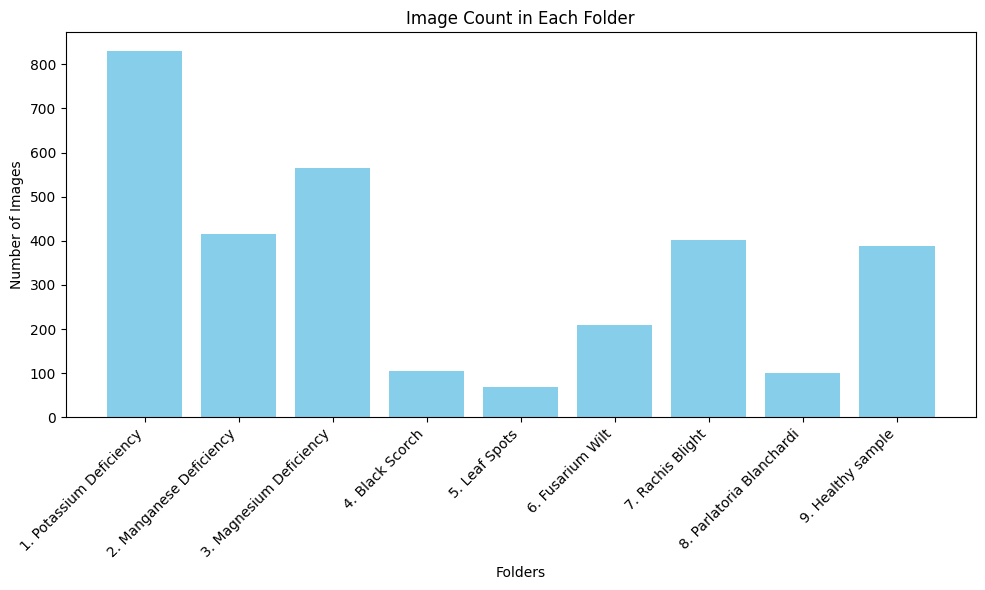

In [ ]:
import os
import matplotlib.pyplot as plt

# main_folder = "/content/drive/MyDrive/MachineLearning Notebooks/palm_disease_project/Processed"
main_folder = "/content/drive/MyDrive/Machine Learning /ML Project/palm_disease_project/Processed"

folder_image_counts = {}

for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    if os.path.isdir(folder_path):
        count = len([file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
        folder_image_counts[folder] = count


folder_image_counts = dict(sorted(folder_image_counts.items()))

# Plot the counts
plt.figure(figsize=(10, 6))
plt.bar(folder_image_counts.keys(), folder_image_counts.values(), color='skyblue')
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Image Count in Each Folder')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insights from the Plot
- "Potassium Deficiency" has the highest number of images, while "Leaf Spots" and "Fusarium Wilt" have significantly fewer samples.
- Such imbalance may affect the model’s ability to generalize across all categories.
- We might need data augmentation or class weighting to address this issue.


### Data Augmentation and Loading
This cell prepares the dataset for training by:
- **Defining Dataset Path**: Specifies the directory containing categorized images.
- **Setting Image Size & Batch Size**: Resizes images to `(224, 224)` and processes them in batches of `32` for efficiency.
- **Applying Data Augmentation**:
  - **Rescaling**: Normalizes pixel values to the range `[0,1]` by dividing by `255`.
  - **Horizontal Flip**: Helps generalization by flipping images randomly.
  - **Zoom & Rotation**: Introduces minor transformations to increase variability.
- **Splitting Data**: Uses `validation_split=0.2` to allocate `20%` of the data for validation.
- **Creating Data Generators**:
  - `train_gen`: Loads augmented training images.
  - `val_gen`: Loads validation images without augmentation.
- **Final Output**: Confirms `2474` training images and `615` validation images across `9` classes.


In [ ]:
# data_dir = "/content/drive/MyDrive/MachineLearning Notebooks/palm_disease_project/Processed"
data_dir = "/content/drive/MyDrive/Machine Learning /ML Project/palm_disease_project/Processed"
img_size = (224, 224)
batch_size = 32

# Data augmentation and loading
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=20
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2474 images belonging to 9 classes.
Found 615 images belonging to 9 classes.


### Principal Component Analysis (PCA) for Dimensionality Reduction
- The extracted features from images can be **high-dimensional**, making it harder for models to process efficiently.
- **PCA (Principal Component Analysis)** helps reduce dimensionality while **retaining the most important information**.
- Instead of selecting a fixed number of components, we will:
  - **Compute the explained variance ratio** to understand how much information each principal component holds.
  - **Determine the optimal number of principal components** needed to retain **95% of the variance**.
  - **Apply PCA using the optimal number of components** to transform the dataset efficiently.
- This ensures we keep **most of the important information** while making the model **faster and more efficient**.


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/78 ━━━━━━━━━━━━━━━━━━━━ 10:59 9s/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


78/78 ━━━━━━━━━━━━━━━━━━━━ 53s 582ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 662ms/step


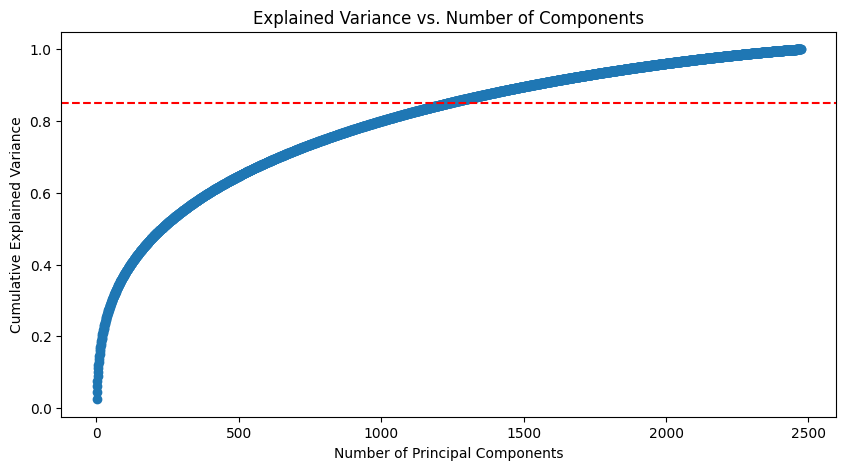

Optimal number of components for 95% variance: 1237
New PCA Feature Shape (Train Set): (2474, 1237)
New PCA Feature Shape (Validation Set): (615, 1237)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

# Image size and batch size (ensure it matches your previous setup)
img_size = (224, 224)
batch_size = 32

# Load MobileNetV2 as a feature extractor
feature_extractor = MobileNetV2(weights='imagenet', include_top=False, input_shape=img_size + (3,))
feature_extractor.trainable = False  # Keep it frozen

# Create a model to extract deep features
feature_model = Model(inputs=feature_extractor.input, outputs=feature_extractor.output)

# Extract features from training images
X_train_features = feature_model.predict(train_gen)
X_val_features = feature_model.predict(val_gen)

# Flatten extracted features
X_train_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_val_flat = X_val_features.reshape(X_val_features.shape[0], -1)

# Apply PCA without limiting components to check variance retention
pca = PCA().fit(X_train_flat)

# Plot cumulative explained variance to determine the optimal number of components
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)  # Cumulative variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.axhline(y=0.85, color='r', linestyle='--')  # Mark 95% threshold
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.show()

# Find the number of PCs needed to retain 95% variance
optimal_components = np.argmax(explained_variance_ratio >= 0.85) + 1
print(f"Optimal number of components for 95% variance: {optimal_components}")

# Apply PCA using the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
X_train_pca_optimal = pca_optimal.fit_transform(X_train_flat)
X_val_pca_optimal = pca_optimal.transform(X_val_flat)

# Print final transformed shape
print("New PCA Feature Shape (Train Set):", X_train_pca_optimal.shape)
print("New PCA Feature Shape (Validation Set):", X_val_pca_optimal.shape)


### Interpretation of PCA Results (85% Variance Retention)
- **Cumulative Explained Variance:**  
  - The curve shows how much variance is retained as we increase the number of principal components.  
  - The model now retains **85% of the variance**.
  - This means we removed more redundant or less informative features, **reducing model complexity**.  

- **New PCA Feature Shape:**  
  - The dataset has been transformed into a **lower-dimensional space**.  
  - This should help speed up training while keeping most of the important information.

## MobileNetV2 Model (Without PCA)

- **Why?**
  - CNNs perform best with **spatial data**, which PCA removed.
  - Pretrained models like MobileNetV2 already extract **efficient deep features**.
  - PCA is more useful for classical ML models, **not CNNs**.
- This model will use **pretrained MobileNetV2** with a **custom classifier** for palm disease detection.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define image size
img_size = (224, 224)

# Load MobileNetV2 without the final classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=img_size + (3,))
base_model.trainable = False  # Freeze convolutional layers

# Build the transfer learning model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Convert feature maps to a single vector
    Dense(256, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Regularization
    Dense(num_classes, activation='softmax')  # Final classification layer
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    batch_size=32,
    callbacks=[lr_scheduler]
)

# Evaluate the model
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


Epoch 1/30
13/78 ━━━━━━━━━━━━━━━━━━━━ 33s 509ms/step - accuracy: 0.2184 - loss: 2.5097

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


78/78 ━━━━━━━━━━━━━━━━━━━━ 76s 864ms/step - accuracy: 0.3632 - loss: 1.9271 - val_accuracy: 0.5805 - val_loss: 1.2060 - learning_rate: 0.0010
Epoch 2/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 53s 685ms/step - accuracy: 0.5968 - loss: 1.1337 - val_accuracy: 0.6325 - val_loss: 1.0878 - learning_rate: 0.0010
Epoch 3/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 50s 641ms/step - accuracy: 0.6999 - loss: 0.9345 - val_accuracy: 0.6683 - val_loss: 0.8993 - learning_rate: 0.0010
Epoch 4/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 52s 663ms/step - accuracy: 0.7418 - loss: 0.7949 - val_accuracy: 0.6943 - val_loss: 0.8653 - learning_rate: 0.0010
Epoch 5/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 50s 643ms/step - accuracy: 0.7299 - loss: 0.7627 - val_accuracy: 0.7154 - val_loss: 0.7452 - learning_rate: 0.0010
Epoch 6/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 53s 677ms/step - accuracy: 0.7616 - loss: 0.6986 - val_accuracy: 0.7610 - val_loss: 0.6558 - learning_rate: 0.0010
Epoch 7/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 51s 659ms/step - accuracy: 0.7719 - loss: 0.6392 - val_

### Analyzing Misclassified Images
- Even though our model has **high accuracy (~87%)**, it still makes mistakes.
- To **understand where the model struggles**, we will:
  - Identify **misclassified images**.
  - Compare the **true labels vs. predicted labels**.
  - **Visualize some misclassified images** to analyze error patterns.
- This analysis helps us **improve model performance** and **make real-world recommendations**.


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 512ms/step
Total Misclassified Samples: 528


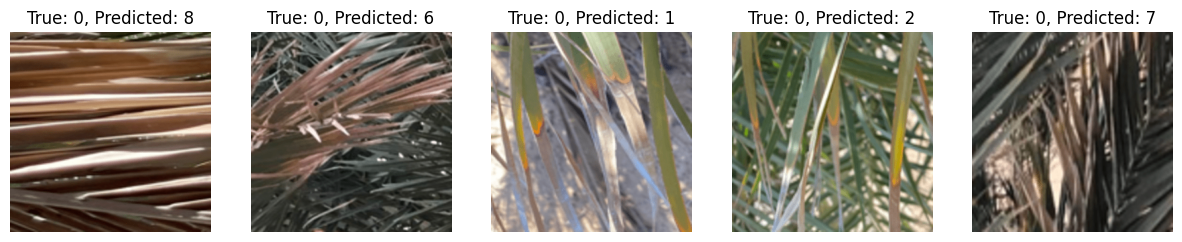

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Get file paths from the dataset directory
file_paths = [os.path.join(val_gen.directory, fname) for fname in val_gen.filenames]

# Get predictions for validation set
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = val_gen.classes  # Actual labels from the validation set

# Identify misclassified indices
misclassified_idx = np.where(y_pred_classes != y_true_classes)[0]

print(f"Total Misclassified Samples: {len(misclassified_idx)}")

# Plot a few misclassified images (from the original dataset)
num_images = min(5, len(misclassified_idx))
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i, idx in enumerate(misclassified_idx[:num_images]):
    img_path = file_paths[idx]  # Get original image path
    img = image.load_img(img_path)  # Load image from disk (before preprocessing)

    true_label = y_true_classes[idx]
    predicted_label = y_pred_classes[idx]

    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"True: {true_label}, Predicted: {predicted_label}")

plt.show()


# 🌍 **Real-World Recommendations for Practical Use**
The goal of this model is to provide **accurate palm disease classification** to help farmers, researchers, and agricultural experts **detect and manage diseases efficiently**. Below are key real-world applications and recommendations:

## **1️⃣ Dataset & Data Collection Improvements**
🔹 **Collect more diverse images** to improve generalization (e.g., different lighting conditions, angles, and seasons).  
🔹 **Balance the dataset** to ensure that all classes have a similar number of images.  
🔹 **Include expert-labeled data** to refine ground-truth accuracy.  

## **2️⃣ Model Enhancement**
🔹 **Fine-tune MobileNetV2** by unfreezing more layers for better feature learning.  
🔹 **Use ensemble learning** (combine multiple models) to improve classification robustness.  
🔹 **Explore additional image-processing techniques** (e.g., edge detection, texture analysis) to enhance disease differentiation.  

## **3️⃣ Integration with Agricultural Systems**
🔹 Deploy the model in a **mobile or web-based application** for real-time disease detection.  
🔹 Combine image classification with **sensor data (e.g., temperature, humidity, soil health)** to improve disease predictions.  
🔹 Provide **recommendations for disease treatment** based on detected diseases (e.g., pesticide suggestions, irrigation changes).  

## **4️⃣ Practical Deployment**
🔹 **Cloud-based AI service:** Upload images via an app for real-time diagnosis.  
🔹 **Offline Model:** Use TensorFlow Lite to run the model on mobile devices for on-field use.  
🔹 **Integration with Drones:** Use aerial images from drones to detect diseases at a large scale.

## **📌 Final Takeaway**
By **improving dataset quality**, **fine-tuning the model**, and **integrating it into practical agricultural systems**, this project can **significantly impact real-world farming and disease management**.  


### Building the Transfer Learning Model
- **Base Model**: Uses **MobileNetV2** pre-trained on ImageNet as a feature extractor.
  - `include_top=False`: Removes the final classification layer.
  - `trainable=False`: Freezes the base model to retain pre-trained weights.
- **Custom Classifier**:
  - `GlobalAveragePooling2D()`: Reduces feature maps to a single vector per image.
  - `Dense(256, activation='relu')`: Adds a fully connected layer for learning patterns.
  - `Dropout(0.5)`: Prevents overfitting by randomly deactivating neurons.
  - `Dense(num_classes, activation='softmax')`: Outputs class probabilities.
